# Michelle pH dependent experiment

Electrode A (old)
1nM total Cu
1e-8 EN


"1nM Cu static.xlsx"

In [1]:
% housekeeping
% clear data and number format
clear; format short e
% turn off warnings
warning off
graphics_toolkit ("notebook"); 
%graphics_toolkit ("plotly"); 
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt(1:n-12);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB']; addpath(JEQUILIBpath);
Cumodelspath=[rootpath,'/Cu_EN']; addpath(Cumodelspath);

In [2]:
% put in constants
%stockCuconc=0.0133; %M
VT=0.05; %total volume
stockCuconc=0.000157366; %M
ENT=1e-8;

In [3]:
% put in data

originalsamplemVnpH=[...
%pH mV
10.001 -70.5
8.054 -42.9
7.042  -44.2
6.103  -42.7
4.014  -24.2 
2.061  -7.7
];

calibdata=[...
%volCu mV pH
0  -7.7 2.061
50 -5.4 2.005
];


pHv,1
1,10.001
2,8.054
3,7.042
4,6.103
5,4.014
6,2.061


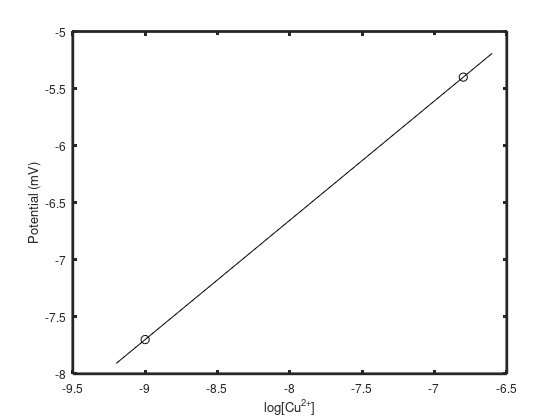

In [4]:
graphics_toolkit("notebook")
% pull out the sample data
pHv=(originalsamplemVnpH(:,1))
mVoriginal=(originalsamplemVnpH(:,2));

%pull out the calibration data
addedCuvol=calibdata(:,1)'*1e-6; pHcalib=calibdata(:,3); mV=calibdata(:,2)'; 
CuTmeas=1e-9; % not actually known until it is measured 
CuT=CuTmeas; CuTplus=(CuTmeas*(VT)+addedCuvol*stockCuconc)./(VT+addedCuvol);

plot(log10(CuTplus),mV,'ko'); hold on

%chlorocorrecxtion
%BF1=2.49; BF2=1.14; BF3=0.9; ClT=4.9904e-4; %from Inorg. Chem. 1983. 22. 3323-3326.
%CuTplus=CuTplus./(1+BF1*ClT+BF2*ClT^2+BF3*ClT^3);

%determine all the slopes and intercepts for each pair of mV values
for i=1:length(mV)-1
    param=polyfit([log10(CuTplus(i)) log10(CuTplus(i+1))],[mV(i) mV(i+1)],1);
    val=polyval(param,[log10(CuTplus(i))-0.2 log10(CuTplus(i+1))+0.2]);
    plot([log10(CuTplus(i))-0.2 log10(CuTplus(i+1))+0.2],val,'k-')
    m(i)=param(1); Eo(i)=param(2); 
    %two ways to define what logCu is for the Eo and m values. need to pick the approach that consistently works best
    logCuT(i)=mean([log10(CuTplus(i)) log10(CuTplus(i+1))]); % calib Cu is the midpoint
    %logCuT(i)=[log10(CuTplus(i))]; % calib Cu is the starting point 
end
xlabel('log[Cu^{2+}]');  ylabel('mV');
set(gca,'fontsize',12); set(gca,'linewidth',2);
xlabel('log[Cu^{2+}]'); ylabel('Potential (mV)')

In [5]:
% then use this metacalibration to determine original sample logCu2+

Eooriginal=mean(Eo(1)); 
moriginal=mean(m(1)); 

moriginalsimple=59.2/2; Eooriginalsimple=mV(1)-moriginalsimple*log10(CuTmeas);

logCuoriginal=(mVoriginal-Eooriginal)/moriginal
logCuoriginalsimple=(mVoriginal-Eooriginalsimple)/moriginalsimple;

logCuoriginal,1
1,-69.0485
2,-42.6577
3,-43.9008
4,-42.4665
5,-24.7771
6,-9


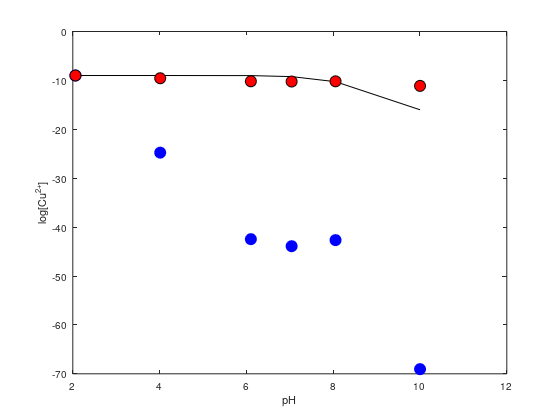

In [6]:
% MODEL FOR COMPARISON
graphics_toolkit("notebook")
%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry

flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
database=[]; 
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=0; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

CuT=CuTmeas; inorganicTOTALS=[CuT ENT];
inorganicTOTALS(inorganicTOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error
TOTALS=[inorganicTOTALS]; %TOTALS=inorganicTOTALS;

for i=1:length(pHv);
    pH=pHv(i); pe=20.75-pH; PCO2=10^-3.5;
    [Cuall(i),CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2open_EN_allsolids(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);
end

plot(pHv,logCuoriginal,'bo','markersize',8,'markerfacecolor','b'); 
hold on
plot(pHv,log10(Cuall),'k-')
plot(pHv,logCuoriginalsimple,'ko','markersize',8,'markerfacecolor','r'); 

xlabel('pH'); ylabel('log[Cu^{2+}]')

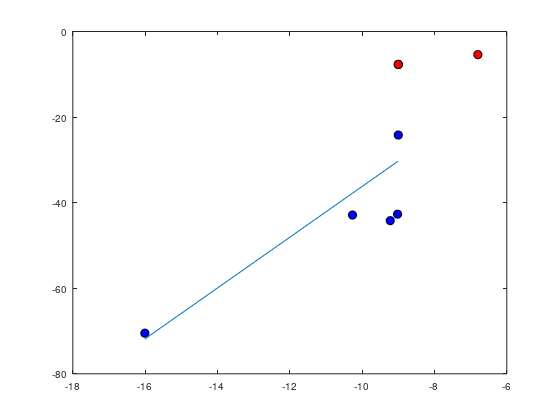

param,1,2
1,5.93428,23.1322


In [7]:
% compare mV measured to modeled log Cu

plot(log10(Cuall),mVoriginal,'ko','markerfacecolor','b')
param=polyfit(log10(Cuall),mVoriginal,1)

fit=polyval(param,log10(Cuall));

hold on 

plot(log10(Cuall),fit)

plot([log10(CuTplus)],mV,'ko','markerfacecolor','r')

In [8]:
log10(Cuall)
logCuoriginal
logCuoriginalsimple

ans,1,2,3,4,5,6
1,-16.0073,-10.2666,-9.22324,-9.01983,-9.00014,-9


logCuoriginal,1
1,-69.0485
2,-42.6577
3,-43.9008
4,-42.4665
5,-24.7771
6,-9


logCuoriginalsimple,1
1,-11.1216
2,-10.1892
3,-10.2331
4,-10.1824
5,-9.55743
6,-9
